In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('taxi.csv')
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
18914,22.5,2013-06-02 01:13:00,-73.997090,40.720635,-73.971983,40.794597,2.0
18915,5.5,2014-10-15 14:47:00,-73.979980,40.751825,-73.973952,40.759965,1.0
18916,6.5,2015-06-28 13:00:47,-73.982315,40.762691,-73.993202,40.767578,1.0
18917,5.3,2011-10-28 17:48:45,-74.001457,40.739338,-73.993607,40.751885,1.0


In [3]:
## Check Summary info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18919 entries, 0 to 18918
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        18919 non-null  float64
 1   pickup_datetime    18919 non-null  object 
 2   pickup_longitude   18919 non-null  float64
 3   pickup_latitude    18919 non-null  float64
 4   dropoff_longitude  18919 non-null  float64
 5   dropoff_latitude   18919 non-null  float64
 6   passenger_count    18918 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.0+ MB


In [5]:
## Check Missing Value

In [6]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [7]:
### Handling Missing Value

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
## Check DataTypes

In [11]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [12]:
## Data Types Conversion

In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [16]:
## Data describe

In [17]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000
mean,11.289221,-72.486834,39.925272,-72.498734,39.913116,1.657205
std,9.551667,10.503808,6.715228,10.461670,6.160671,1.282236
min,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992223,40.734687,-73.991233,40.734589,1.000000
50%,8.500000,-73.981758,40.752620,-73.980234,40.753566,1.000000
75%,12.500000,-73.966788,40.767427,-73.963834,40.768067,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [18]:
### Data preparation

## Adding Features :
- Jarak (Simplify)
- Jam (Jam pulang dan jam berangkat kantor)
- Hari : Hari kerja atau Libur
- Lokasi
- Tahun
- Jumlah penumpang

In [19]:
### Features Extraction => Datetime Extract

In [20]:
pickup_dt = df['pickup_datetime'].dt

In [21]:
df['year'] = pickup_dt.year ## Mengambil tahun
df['month'] = pickup_dt.month ## Mengambil bulan
df['date'] = pickup_dt.day ## Mengambil tanggal

In [22]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9


In [23]:
df['day'] = pickup_dt.dayofweek

In [24]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1


In [25]:
def WeekEnd(x) :
    if x > 4:
        return 1
    else:
        return 0

In [26]:
df['Weekend'] = df['day'].apply(WeekEnd)

In [27]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,Weekend
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,1
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,0


In [28]:
df.drop(columns= 'pickup_datetime', inplace = True)

In [29]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,Weekend
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,0


In [30]:
### Membuat Jarak - Simplify
df['distance'] = abs((df['pickup_longitude'] - df['dropoff_longitude']) + (df['pickup_latitude'] - df['dropoff_latitude']))

In [31]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,Weekend,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,0,0.006340
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,0,0.107481
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,0.019212
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,1,0.020512
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,0,0.027194


In [32]:
df.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_latitude', 'dropoff_longitude'], inplace = True)

In [33]:
df.head()

,fare_amount,passenger_count,year,month,date,day,Weekend,distance
0,4.5,1.0,2009,6,15,0,0,0.006340
1,16.9,1.0,2010,1,5,1,0,0.107481
2,5.7,2.0,2011,8,18,3,0,0.019212
3,7.7,1.0,2012,4,21,5,1,0.020512
4,5.3,1.0,2010,3,9,1,0,0.027194


In [34]:
### Machine Learning Modelling

In [35]:
### Splitting Data

In [36]:
X = df.drop(columns='fare_amount')
y = df['fare_amount']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .80, random_state = 42)

In [38]:
X_train.shape

(15134, 7)

In [39]:
X_test.shape

(3784, 7)

In [40]:
X_train.head()

,passenger_count,year,month,date,day,Weekend,distance
7539,1.0,2011,6,14,1,0,0.000000
578,3.0,2010,3,25,3,0,0.009293
8056,5.0,2010,4,12,0,0,0.048951
11761,1.0,2014,11,17,0,0,0.021735
15531,1.0,2012,12,29,5,1,0.010498


In [41]:
X_test.head()

,passenger_count,year,month,date,day,Weekend,distance
12565,1.0,2012,6,15,4,0,0.034270
5282,1.0,2012,1,19,3,0,0.013032
4525,2.0,2010,11,16,1,0,0.058549
17370,2.0,2011,2,9,2,0,0.069345
9239,1.0,2013,10,7,0,0,0.013675


In [42]:
## Base Model

In [43]:
Model_1 = LinearRegression(fit_intercept = False)

In [44]:
Model_1.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [45]:
### Evaluation

In [46]:
## Training

In [47]:
y_pred_tr = Model_1.predict(X_train)

In [48]:
r2_score(y_train, y_pred_tr)

0.001311695445722183

In [49]:
mean_absolute_error(y_train, y_pred_tr)

6.015018423617373

In [50]:
y_train.mean()

11.32310757235361

In [51]:
np.sqrt(mean_squared_error(y_train, y_pred_tr))

9.623413033305088

In [52]:
## Testing

In [53]:
y_pred_ts = Model_1.predict(X_test)

In [54]:
r2_score(y_test, y_pred_ts)

0.0027377484669763863

In [55]:
mean_absolute_error(y_test, y_pred_ts)

5.806390978693578

In [56]:
y_test.mean()

11.153694503171263

In [57]:
mean_squared_error(y_test, y_pred_ts)

84.96535334312448

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred_ts))

9.217665286997812

In [59]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [60]:
r2_train, MAE_train, MSE_train, RMSE_train = Eva_Matrix(Model_1, X_train, y_train)

In [61]:
r2_train

0.001311695445722183

In [62]:
r2_test, MAE_test, MSE_test, RMSE_test = Eva_Matrix(Model_1, X_test, y_test)

In [63]:
r2_test

0.0027377484669763863

In [64]:
data = {
    "Training" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "Testing" : [r2_test, MAE_test, MSE_test, RMSE_test]
}

In [65]:
pd.DataFrame(data = data, index = ['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,0.001312,0.002738
MAE,6.015018,5.806391
MSE,92.610078,84.965353
RMSE,9.623413,9.217665


In [66]:
def Eva_Matrix_DF(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_tr = Model.predict(X_train)
    R2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train, y_pred_tr)
    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    y_pred_ts = Model.predict(X_test)
    R2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test, y_pred_ts)
    MSE_ts = mean_squared_error(y_test, y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    data = {
    "Training " + Nama : [R2_tr, MAE_tr, MSE_tr, RMSE_tr],
    "Testing " + Nama: [R2_ts, MAE_ts, MSE_ts, RMSE_ts]}
    df = pd.DataFrame(data = data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
    return df

### Optimize 3

In [67]:
df_LinReg = Eva_Matrix_DF(LinearRegression(), X_train, X_test, y_train, y_test, "LinReg")

In [68]:
df_LinReg

,Training LinReg,Testing LinReg
R2,0.015828,0.014460
MAE,5.944604,5.754850
MSE,91.263949,83.966595
RMSE,9.553217,9.163329


In [69]:
Model_2 = Lasso()

In [70]:
Model_2.fit(X_train, y_train)

Lasso()

In [71]:
df_Lasso = Eva_Matrix_DF(Lasso(), X_train, X_test, y_train, y_test, "Lasso")

In [72]:
df_Lasso

,Training Lasso,Testing Lasso
R2,0.011036,0.009815
MAE,5.968452,5.762308
MSE,91.708313,84.362417
RMSE,9.576446,9.184902


In [73]:
Model_3 = Ridge()

In [74]:
Model_3.fit(X_train, y_train)

Ridge()

In [75]:
df_Ridge = Eva_Matrix_DF(Ridge(), X_train, X_test, y_train, y_test, "Ridge")

In [76]:
df_Ridge

,Training Ridge,Testing Ridge
R2,0.015828,0.014461
MAE,5.944604,5.754848
MSE,91.263949,83.966578
RMSE,9.553217,9.163328


In [77]:
Model_4 = ElasticNet()

In [78]:
Model_4.fit(X_train, y_train)

ElasticNet()

In [79]:
df_ElasticNet = Eva_Matrix_DF(ElasticNet(), X_train, X_test, y_train, y_test, "ElasticNet")

In [80]:
df_ElasticNet

,Training ElasticNet,Testing ElasticNet
R2,0.013552,0.012881
MAE,5.956093,5.754456
MSE,91.474975,84.101157
RMSE,9.564255,9.170668


In [81]:
pd.concat([df_LinReg, df_Ridge, df_Lasso, df_ElasticNet], axis = 1)

,Training LinReg,Testing LinReg,Training Ridge,Testing Ridge,Training Lasso,Testing Lasso,Training ElasticNet,Testing ElasticNet
R2,0.015828,0.014460,0.015828,0.014461,0.011036,0.009815,0.013552,0.012881
MAE,5.944604,5.754850,5.944604,5.754848,5.968452,5.762308,5.956093,5.754456
MSE,91.263949,83.966595,91.263949,83.966578,91.708313,84.362417,91.474975,84.101157
RMSE,9.553217,9.163329,9.553217,9.163328,9.576446,9.184902,9.564255,9.170668


### Optimize 2

- Using Feature Engineering (Polynomial - Polynomial Transformer)

In [82]:
X_train.head()

,passenger_count,year,month,date,day,Weekend,distance
7539,1.0,2011,6,14,1,0,0.000000
578,3.0,2010,3,25,3,0,0.009293
8056,5.0,2010,4,12,0,0,0.048951
11761,1.0,2014,11,17,0,0,0.021735
15531,1.0,2012,12,29,5,1,0.010498


In [83]:
## Feature Engineering

In [84]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [85]:
#### Power Transformer

In [86]:
yeo_pow = PowerTransformer(method='yeo-johnson')

In [87]:
num_col = df[['passenger_count', 'distance', 'year']]

In [88]:
num_poly = poly.fit_transform(num_col)

In [89]:
num_pow = yeo_pow.fit_transform(num_poly)

In [90]:
df_pow = pd.DataFrame(num_pow)

In [91]:
df_pow.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.541042,-1.053236,1.0,-0.600677,-1.081936,-0.514831,-0.495979,-0.882452,-1.012162,-0.623728,-0.941961,-0.513990,-0.538653,-0.983503,-0.518532,-0.197541,-1.184868,-0.717414,-1.0
1,-0.541042,1.878846,1.0,-0.600677,1.278273,-0.514100,1.767568,1.333108,-1.007354,-0.623728,0.626139,-0.513574,1.257450,0.956526,-0.517123,0.506135,1.663864,1.212546,-1.0
2,0.914194,-0.377609,1.0,1.185880,0.003999,0.577272,-0.420281,-0.076170,-1.003146,1.262003,0.270707,0.646762,-0.409884,0.200604,0.557731,-0.193578,-0.382919,-0.073011,-1.0
3,-0.541042,-0.316858,1.0,-0.600677,-0.547070,-0.512641,-0.408462,-0.025478,-0.998939,-0.623728,-0.641979,-0.512742,-0.468091,-0.233355,-0.514305,-0.192686,-0.298870,-0.030280,-1.0
4,-0.541042,-0.023812,1.0,-0.600677,-0.326710,-0.514100,-0.335893,0.193551,-1.007354,-0.623728,-0.511800,-0.513574,-0.409645,-0.041577,-0.517123,-0.186034,0.091814,0.155342,-1.0


In [92]:
df.head()

,fare_amount,passenger_count,year,month,date,day,Weekend,distance
0,4.5,1.0,2009,6,15,0,0,0.006340
1,16.9,1.0,2010,1,5,1,0,0.107481
2,5.7,2.0,2011,8,18,3,0,0.019212
3,7.7,1.0,2012,4,21,5,1,0.020512
4,5.3,1.0,2010,3,9,1,0,0.027194


In [93]:
df_1 = pd.concat([df.drop(columns =['passenger_count', 'year', 'distance']), df_pow], axis = 1)
df_1.head()

,fare_amount,month,date,day,Weekend,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,4.5,6,15,0,0,-0.541042,-1.053236,1.0,-0.600677,-1.081936,...,-0.623728,-0.941961,-0.513990,-0.538653,-0.983503,-0.518532,-0.197541,-1.184868,-0.717414,-1.0
1,16.9,1,5,1,0,-0.541042,1.878846,1.0,-0.600677,1.278273,...,-0.623728,0.626139,-0.513574,1.257450,0.956526,-0.517123,0.506135,1.663864,1.212546,-1.0
2,5.7,8,18,3,0,0.914194,-0.377609,1.0,1.185880,0.003999,...,1.262003,0.270707,0.646762,-0.409884,0.200604,0.557731,-0.193578,-0.382919,-0.073011,-1.0
3,7.7,4,21,5,1,-0.541042,-0.316858,1.0,-0.600677,-0.547070,...,-0.623728,-0.641979,-0.512742,-0.468091,-0.233355,-0.514305,-0.192686,-0.298870,-0.030280,-1.0
4,5.3,3,9,1,0,-0.541042,-0.023812,1.0,-0.600677,-0.326710,...,-0.623728,-0.511800,-0.513574,-0.409645,-0.041577,-0.517123,-0.186034,0.091814,0.155342,-1.0


In [94]:
X_1 = df_1.drop(columns='fare_amount')
y_1 = df_1['fare_amount']

In [95]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, train_size =0.80, random_state =42)

In [96]:
df_LinReg2 = Eva_Matrix_DF(LinearRegression(fit_intercept=False), X_train_1, X_test_1, y_train_1, y_test_1, "LinReg2")
df_LinReg2

,Training LinReg2,Testing LinReg2
R2,0.496653,0.520852
MAE,3.574548,3.469734
MSE,46.676191,40.822746
RMSE,6.831998,6.389268


In [97]:
### Tanya kapan dipakai scalling, kemudian recategorize

Optimize 2
- Using Freature Engineering + Others Algorithm

In [98]:
df_Ridge2 = Eva_Matrix_DF(Ridge(), X_train_1, X_test_1, y_train_1, y_test_1, "Ridge")
df_Ridge2

,Training Ridge,Testing Ridge
R2,0.493299,0.516700
MAE,3.570480,3.465919
MSE,46.987247,41.176502
RMSE,6.854724,6.416892


In [99]:
df_Lasso2 = Eva_Matrix_DF(Lasso(), X_train_1, X_test_1, y_train_1, y_test_1, "Lasso")
df_Lasso2

,Training Lasso,Testing Lasso
R2,0.416314,0.437808
MAE,3.896836,3.778208
MSE,54.126178,47.897958
RMSE,7.357050,6.920835


In [100]:
df_ElasticNet2 = Eva_Matrix_DF(ElasticNet(), X_train_1, X_test_1, y_train_1, y_test_1, "ElasticNet")
df_ElasticNet2

,Training ElasticNet,Testing ElasticNet
R2,0.407576,0.425610
MAE,3.968117,3.861302
MSE,54.936520,48.937248
RMSE,7.411917,6.995516


In [101]:
pd.concat([df_LinReg2, df_Ridge2, df_Lasso2, df_ElasticNet2], axis = 1).T.sort_values('R2', ascending =False)

,R2,MAE,MSE,RMSE
Testing LinReg2,0.520852,3.469734,40.822746,6.389268
Testing Ridge,0.516700,3.465919,41.176502,6.416892
Training LinReg2,0.496653,3.574548,46.676191,6.831998
Training Ridge,0.493299,3.570480,46.987247,6.854724
Testing Lasso,0.437808,3.778208,47.897958,6.920835
Testing ElasticNet,0.425610,3.861302,48.937248,6.995516
Training Lasso,0.416314,3.896836,54.126178,7.357050
Training ElasticNet,0.407576,3.968117,54.936520,7.411917


### Optimize 3

- Tuning (Manual Tuning)
=> Tuning ==> Proses pencarian value terbaik untuk Hyper parameter dari Algoritma ML
=> Ketika memasukkan Value parameter yang ingin diuji, pastikan parameter default sudah ikut di dalamnya

In [102]:
Alpha = np.arange(0, 3, 0.01)

In [103]:
train_r = []
test_r = []

for i in Alpha:
    Model_R = Ridge(alpha =i)
    Model_R.fit(X_train_1, y_train_1)
    y_pred_tr = Model_R.predict(X_train_1)
    R2_train = r2_score(y_train_1, y_pred_tr)
    train_r.append(R2_train)
    y_pred_test = Model_R.predict(X_test_1)
    R2_test = r2_score(y_test_1, y_pred_test)
    test_r.append(R2_test)


<function matplotlib.pyplot.show(close=None, block=None)>

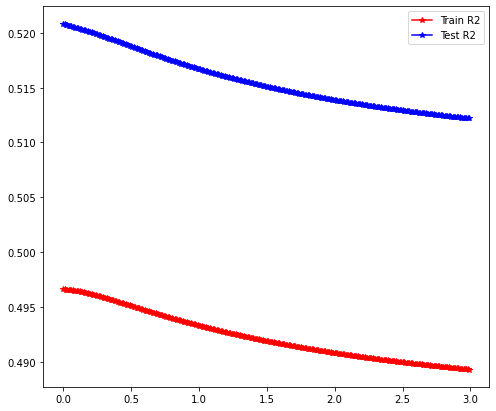

In [104]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_r, 'r*-')
plt.plot(Alpha, test_r, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show

In [105]:
def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):
    train_r = []
    test_r = []

    for i in Alpha:
        Model_R = Model(alpha =i)
        Model_R.fit(X_train, y_train)
        y_pred_tr = Model_R.predict(X_train)
        R2_train = r2_score(y_train, y_pred_tr)
        train_r.append(R2_train)
        y_pred_test = Model_R.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r


In [106]:
Alpha = np.arange(0, 1, 0.0001)

In [107]:
train_Enet, test_Enet = Manual_Tune(Alpha, X_train_1, X_test_1, y_train_1, y_test_1, ElasticNet)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_Enet, 'r*-')
plt.plot(Alpha, test_Enet, 'b*-')
plt.ylabel("R2")
plt.xlabel("Alpha")
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [ ]:
### Distribusi Error

In [ ]:
df_error_T = X_train_1.copy()

In [ ]:
df_error_T.head()

In [ ]:
df_error_T['target'] = y_train_1

In [ ]:
df_error_T.head()

In [ ]:
np.max(test_Enet)

In [ ]:
np.max(test_r)

In [ ]:
Alpha[np.argmax(test_r)]

In [ ]:
Model_R = Ridge(alpha=0.0)

In [ ]:
Model_R.fit(X_train_1, y_train_1)

In [ ]:
pred_train = Model_R.predict(X_train_1)

In [ ]:
df_error_T['prediksi'] = pred_train

In [ ]:
df_error_T['Error'] = abs(df_error_T['target'] - df_error_T['prediksi'])

In [ ]:
plt.hist(df_error_T['Error'])
plt.xlabel('Error')
plt.show()

In [ ]:
sns.distplot(df_error_T['Error'])
plt.show()

In [ ]:
plt.scatter(df_error_T['target'], df_error_T['Error'])
plt.xlabel('Target')
plt.show()

In [ ]:
df_error_T.sort_values('Error', ascending = False)